In [34]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [35]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01,374.475800,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05,374.951874,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06,371.649323,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07,368.991425,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08,369.507172,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [36]:
news_df = pd.read_csv('technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
news_df = news_df[news_df['title'] != 'Before you continue']


df1 = stock_df[['time_published', 'Adj Close', 'Open']]
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,time_published,Adj Close,Open,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,...,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,2023-09-01,374.475800,380.399994,-1.0,0.011936,0.152958,0.173515,0.156254,-1.0,-0.108245,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.193063
1,2023-09-05,374.951874,376.769989,-1.0,-0.043037,-1.000000,0.224852,0.113085,-1.0,0.080024,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.204264
2,2023-09-06,371.649323,377.279999,-1.0,0.062341,0.097872,0.255724,0.073166,-1.0,-0.037002,...,-1.0,-1.0,0.114045,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.175756
3,2023-09-07,368.991425,370.209991,-1.0,0.230936,-1.000000,0.206763,-0.019377,-1.0,-0.107900,...,-1.0,-1.0,0.159195,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.214652
4,2023-09-08,369.507172,372.010010,-1.0,-0.041194,-1.000000,0.163066,0.079105,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,0.209266,-1.0,-1.0,-1.0,0.198217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2024-02-12,433.466034,436.940002,-1.0,-1.000000,-1.000000,0.269321,-1.000000,-1.0,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,0.069078,-1.000000,-1.0,-1.0,-1.0,0.176841
112,2024-02-13,426.705261,427.279999,-1.0,-0.042760,-1.000000,0.222389,0.014681,-1.0,-0.043837,...,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.176696
113,2024-02-14,431.355164,431.260010,-1.0,0.016277,-1.000000,0.149452,0.219216,-1.0,0.274000,...,-1.0,-1.0,-1.000000,-1.000000,0.033229,-1.000000,-1.0,-1.0,-1.0,0.159762
114,2024-02-15,432.639618,433.920013,-1.0,-0.135974,-1.000000,0.163334,0.162597,-1.0,0.325678,...,-1.0,-1.0,-1.000000,-1.000000,0.173152,-1.000000,-1.0,-1.0,-1.0,0.191772


# XGBoost Data Preparation

In [37]:
# List of columns representing sentiment scores
news_sentiment_columns = [
    'Al Jareeza', 'Associated Press', 'Barrons', 'Benzinga', 'Business Insider',
    'Business Standard', 'CNBC', 'CNN', 'Canada Newswire', 'Cointelegraph',
    'Decrypt.co', 'Financial News London', 'Financial Times', 'Forbes',
    'Fox Business News', 'GlobeNewswire', 'Investing News Network',
    'Investor Ideas', 'Investors Business Daily', 'Kiplinger', 'MarketWatch',
    'Money Control', 'Money Morning', 'Motley Fool', 'New York Times',
    'PR Newswire', 'PennyStocks.com', 'Reuters', 'South China Morning Post',
    'StockMarket.com', 'Stocknews.com', 'The Atlantic', 'The Economist',
    'The Financial Express', 'The Street', 'The Week News', 'UPI Business',
    'Wall Street Journal', 'Zacks Commentary'
]

# Calculate the mean sentiment across all news sources
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)

# Calculate other possible aggregation metrics (optional)
combined_df['aggregate_sentiment_median'] = combined_df[news_sentiment_columns].median(axis=1)
combined_df['aggregate_sentiment_std'] = combined_df[news_sentiment_columns].std(axis=1)

# Fill missing values with 0 before aggregation
combined_df[news_sentiment_columns] = combined_df[news_sentiment_columns].fillna(0)

# Recalculate the mean sentiment
combined_df['aggregate_sentiment_mean'] = combined_df[news_sentiment_columns].mean(axis=1)


print(combined_df[['time_published', 'aggregate_sentiment_mean']].head())

  time_published  aggregate_sentiment_mean
0     2023-09-01                 -0.580023
1     2023-09-05                 -0.552526
2     2023-09-06                 -0.548218
3     2023-09-07                 -0.496186
4     2023-09-08                 -0.701866


In [38]:

# Create weekly input features (7-day rolling sentiment) and targets (7-day future prices)
for i in range(1, 8):
    combined_df[f'sentiment_day_{i}'] = combined_df['aggregate_sentiment_mean'].shift(i)
    combined_df[f'price_day_{i}'] = combined_df['Adj Close'].shift(-i)

# Drop rows with NaN values after shifting
combined_df = combined_df.dropna()

# Prepare features (X) and labels (y)
X = combined_df[[f'sentiment_day_{i}' for i in range(1, 8)]].values
y = combined_df[[f'price_day_{i}' for i in range(1, 8)]].values

print("Features (X):", X.shape)
print("Labels (y):", y.shape)


Features (X): (102, 7)
Labels (y): (102, 7)


In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler

# X = combined_df.drop(['Adj Close', 'time_published'], axis=1)
# y = combined_df["Adj Close"]

# X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
#     X, y, combined_df['time_published'], test_size=0.2, random_state=506
# )

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# y_train = np.array(y_train)
# y_test = np.array(y_test)

# print(X_train.shape, )

(81, 57)


In [39]:
# Prepare features (X) and labels (y)
X = combined_df[[f'sentiment_day_{i}' for i in range(1, 8)]].values
y = combined_df[[f'price_day_{i}' for i in range(1, 8)]].values

# Train-test split (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

# Print shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Training Labels (y_train):", y_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Testing Labels (y_test):", y_test.shape)

Training Features (X_train): (81, 7)
Training Labels (y_train): (81, 7)
Testing Features (X_test): (21, 7)
Testing Labels (y_test): (21, 7)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 138830.8906 - val_loss: 163401.8438
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 137582.4531 - val_loss: 163376.9375
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 137909.7969 - val_loss: 163356.4062
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 137908.8438 - val_loss: 163331.0938
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 137044.0469 - val_loss: 163297.1875
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 137543.9219 - val_loss: 163254.0781
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 137885.9219 - val_loss: 163201.7031
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 137598.2812 - val_loss: 163139.4375
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 137447.1719 - val_loss: 163064.7656
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 138621.9844 - val_loss: 162974.5625
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 136183.3281

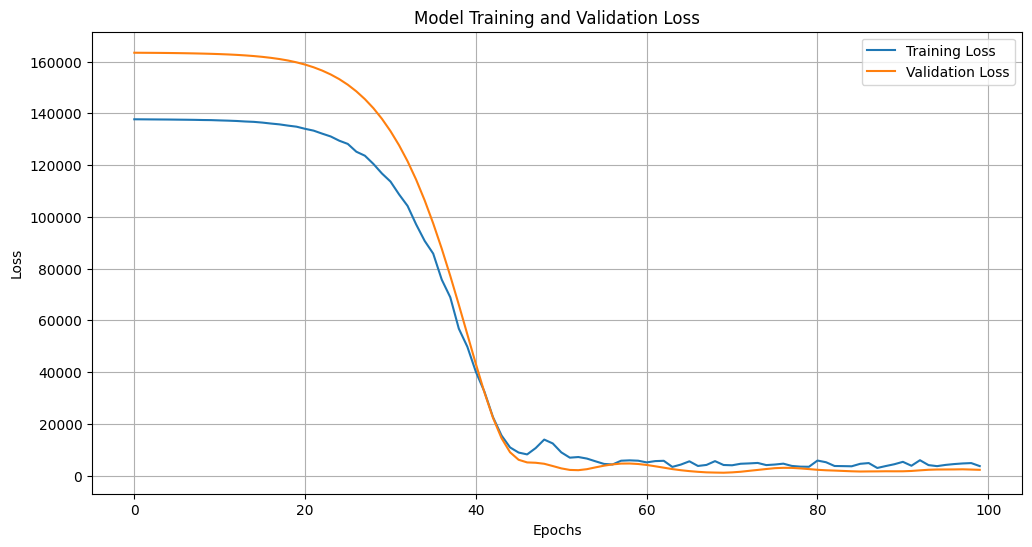

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dropout(0.2),  # Add dropout to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(7)  # Output layer: Predict 7 future prices
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Generate predictions for the test set
predicted_prices_test = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, predicted_prices_test)

# Calculate R-squared
r2 = r2_score(y_test, predicted_prices_test)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Mean Squared Error (MSE): 2616.5261818988843
R-squared (R^2): -55.4489974731188


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Prices for the next week: [[344.72357 343.44714 344.18765 345.09424 346.3986  345.40594 347.4674 ]]


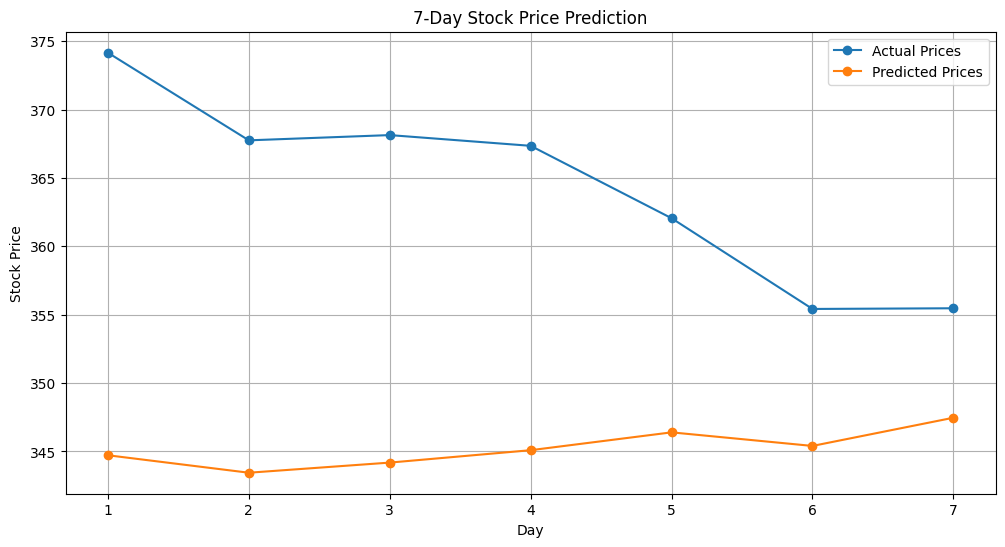

In [41]:
# Predict for a single example
sample_input = X[0].reshape(1, -1)  # Reshape for prediction
predicted_prices = model.predict(sample_input)
print("Predicted Prices for the next week:", predicted_prices)

# Visualization of predicted vs actual
actual_prices = y[0]  # Corresponding actual prices

plt.figure(figsize=(12, 6))
plt.plot(range(1, 8), actual_prices, label='Actual Prices', marker='o')
plt.plot(range(1, 8), predicted_prices[0], label='Predicted Prices', marker='o')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.title('7-Day Stock Price Prediction')
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


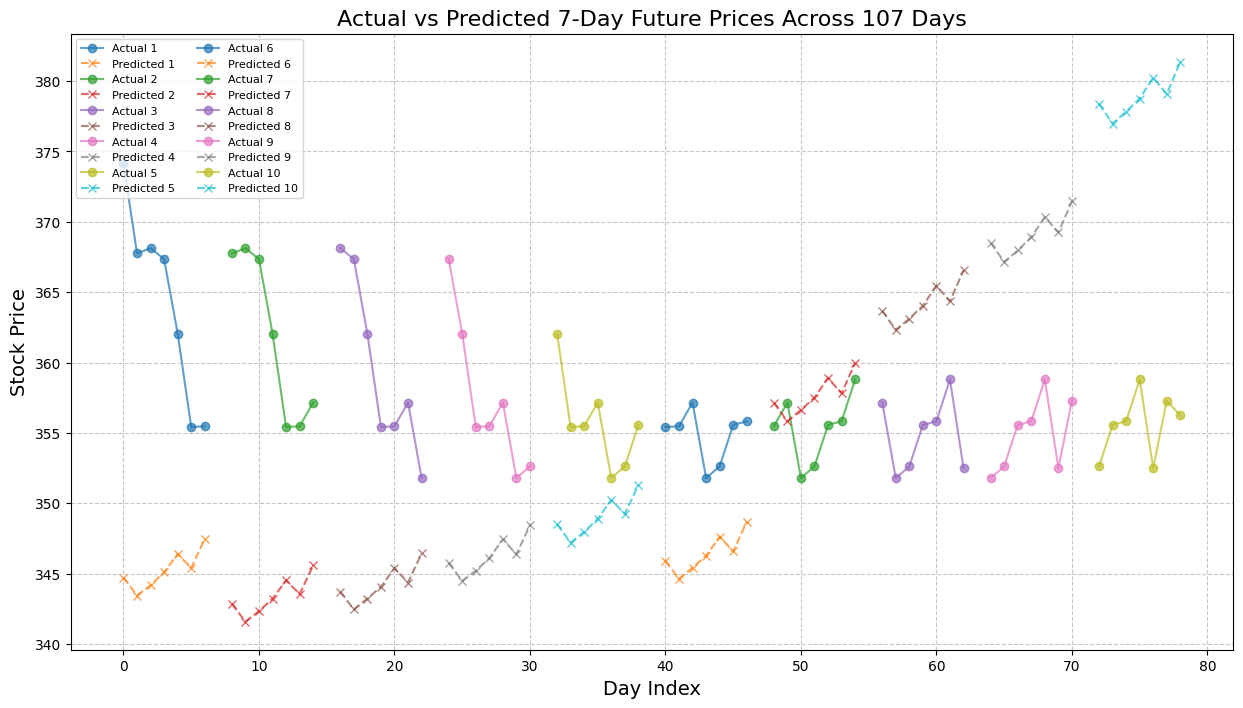

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the entire dataset
predicted_prices_all = model.predict(X)

# Loop through all 107 days to plot individual predictions
plt.figure(figsize=(15, 8))
for i in range(10):  # Assuming there are 107 days
    # Get actual and predicted prices for this day
    actual_prices = y[i]  # Actual 7-day future prices
    predicted_prices = predicted_prices_all[i]  # Predicted 7-day future prices

    # Plot actual and predicted prices
    plt.plot(range(i * 8, i * 8 + 7), actual_prices, label=f'Actual {i+1}', linestyle='-', marker='o', alpha=0.7)
    plt.plot(range(i * 8, i * 8 + 7), predicted_prices, label=f'Predicted {i+1}', linestyle='--', marker='x', alpha=0.7)

plt.title('Actual vs Predicted 7-Day Future Prices Across 107 Days', fontsize=16)
plt.xlabel('Day Index', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(loc='upper left', fontsize=8, ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()